In [1]:
import pandas as pd
from micom.workflows import GrowthResults


In [2]:
annotations = pd.read_csv("/proj/gibbons/sswegle_micom/Res_Saves/annotations_swegle.csv")
exchanges = pd.read_csv("/proj/gibbons/sswegle_micom/Res_Saves/exchanges_swegle.csv")
growth_rates = pd.read_csv("/proj/gibbons/sswegle_micom/Res_Saves/growth_rates_swegle.csv")
growth_rates = pd.read_csv("/proj/gibbons/sswegle_micom/Res_Saves/growth_rates_swegle.csv")
res = GrowthResults(growth_rates, exchanges, annotations)

need to download the csv file from the niche map 

In [3]:
from micom.viz import plot_exchanges_per_taxon
#pl = plot_exchanges_per_taxon(res, filename = "niche_swegle.html")

In [4]:
import pandas as pd
import warnings

warnings.simplefilter("ignore")  # don't show warnings

embedding = pd.read_csv("reduced.csv")
embedding

,sample_id,taxon,TSNE 1,TSNE 2
0,SRR15032078,Acidaminococcus,-38.647217,-21.171783
1,SRR15032078,Adlercreutzia,5.329486,-27.755490
2,SRR15032078,Akkermansia,12.995667,-89.470210
3,SRR15032078,Alistipes,39.536068,48.300327
4,SRR15032078,Anaerostipes,-50.379265,-47.870903
...,...,...,...,...
6307,SRR15032514,Roseburia,-21.737738,-31.961570
6308,SRR15032514,Ruminococcus,-29.471172,0.047363
6309,SRR15032514,Streptococcus,-0.677639,79.644540
6310,SRR15032514,Subdoligranulum,-15.105680,-48.566006


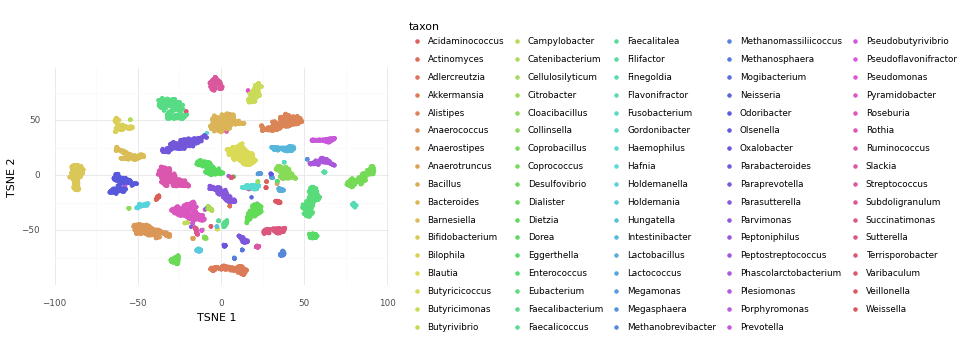

<ggplot: (8744739299163)>

In [5]:
from plotnine import *
theme_set(theme_minimal())

pl = (
    ggplot(embedding)
    + aes(x="TSNE 1", y="TSNE 2", color="taxon") 
    + geom_point()
)
pl

In [ ]:
interest = ["Bacteroides", "Faecalibacterium", "Akkermansia"]

pl = (
    ggplot(embedding)
    + aes(x="TSNE 1", y="TSNE 2") 
    + geom_point(color="silver")
    + geom_point(data=embedding[embedding.taxon.isin(interest)], mapping=aes(color="taxon"))
)
pl

need to add in a metadata column 

In [ ]:
metadata = pd.read_csv("/proj/gibbons/sswegle_micom/All the Steps/metadata_swegle.csv")
metadata

In [ ]:
filtered_meta = metadata[metadata.time_point < 8]

In [ ]:
merged = embedding.merge(filtered_meta, on="sample_id")

In [ ]:
merged

In [ ]:
pl = (
    ggplot(merged)
    + aes(x="TSNE 1", y="TSNE 2") 
    + geom_point(color="silver")
    + geom_point(data=merged[merged.taxon.isin(interest)], mapping=aes(color="taxon"))
    + facet_wrap("~ medium")
    + theme(figure_size=(8, 3))
)
pl

In [ ]:
interest = ["Prevotella", "Dietzia", "Butyrivibrio", "Citrobacter", "Bacteroides", "Bacillus", "Hespellia", "Clostridium XVIII", "Desulfovbrio", "Lactobacillus"] 

In [ ]:
pl = (
    ggplot(merged)
    + aes(x="TSNE 1", y="TSNE 2") 
    + geom_point(color="silver")
    + geom_point(data=merged[merged.taxon.isin(interest)], mapping=aes(color="taxon"))
    + facet_wrap("~ medium")
    + theme(figure_size=(8, 3))
)
pl

In [ ]:
interest = ["Prevotella"] 

In [ ]:
pl = (
    ggplot(merged)
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_point(color="silver")
    + geom_point(data=merged[merged.taxon.isin(interest)], mapping=aes(color="taxon"))
    #+ facet_wrap("~ medium")
    + theme(figure_size=(8, 3))
)
pl

In [ ]:
interest = ["Bacillus", "Lactobacillus", "Prevotella"] 

In [ ]:
pl = (
    ggplot(merged)
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_point(color="silver")
    + geom_point(data=merged[merged.taxon.isin(interest)], mapping=aes(color="taxon"))
    + facet_wrap("~ medium")
    + theme(figure_size=(8, 3))
)
pl

In [ ]:
pl = (
    ggplot(merged[merged.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2", color="medium", group = "sample_id") 
    + geom_line(alpha=0.5)
    + geom_point()
    + facet_wrap("~ taxon")
    + theme(figure_size=(10, 3))
)
pl

In [ ]:
pl = (
    ggplot(merged[merged.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2", color="medium") 
    + geom_line(alpha=0.5)
    + geom_point()
    + facet_wrap("~ taxon")
    + theme(figure_size=(10, 3))
)
pl

In [ ]:
sra_metadata_table = pd.read_csv("/proj/gibbons/2022_fiber_fermented_16S/data/sra_metadata.csv")

In [ ]:
sra_metadata_table.rename(columns={"Run": "sample_id"}, inplace=True)
sra_metadata_table

In [ ]:
merged_with_host_id = merged.merge(sra_metadata_table, on="sample_id")

In [ ]:
merged_with_host_id.to_csv("/proj/gibbons/sswegle_micom/All the Steps/merged_with_host_id.csv")

In [ ]:
interest = ["Prevotella"]

In [ ]:
pl = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2", color="host_subject_id") 
    + geom_line(alpha=0.5)
    + geom_point()
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)
pl

In [ ]:
interest = ["Lactobacillus"]

In [ ]:
pl = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2", color="host_subject_id") 
    + geom_line(alpha=0.5)
    + geom_point()
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)
pl

In [ ]:
merged_with_host_id["string_host_id"] = merged_with_host_id["host_subject_id"].apply(str)
merged_with_host_id

In [ ]:
interest = ["Prevotella"]

In [ ]:
Prevotella_total = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2", color="string_host_id") 
    #+ geom_line(alpha=0.5)
    + geom_point()
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)
Prevotella_total

#Prevotella_total.save("Prevotella_total_niche.png")

In [ ]:
Prevotella_total

In [ ]:
interest = ["Prevotella"]
host_list = ["8002"]

In [ ]:
pl = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    + geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[merged_with_host_id.string_host_id.isin(host_list)], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)
pl

In [ ]:
interest = ["Prevotella"]
host_list = ["8002"]

In [ ]:
Prevotella_8002 = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Prevotella_8002.save("Prevotella_8002.png")

In [ ]:
Prevotella_8002

In [ ]:
interest = ["Prevotella"]
host_list = ["8011"]

In [ ]:
pl = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)
pl

In [ ]:
interest = ["Prevotella"]
host_list = ["8023"]

In [ ]:
Prevotella_8023 = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Prevotella_8023.save("Prevotella_8023.png")

In [ ]:
Prevotella_8023

In [ ]:
interest = ["Prevotella"]
host_list = ["8004"]

In [ ]:
Prevotella_8004 = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Prevotella_8004.save("Prevotella_8004.png")

In [ ]:
Prevotella_8004

In [ ]:
interest = ["Prevotella"]
host_list = ["8006"]

In [ ]:
Prevotella_8006 = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Prevotella_8006.save("Prevotella_8006.png")

In [ ]:
Prevotella_8006

In [ ]:
interest = ["Prevotella"]
host_list = ["8018"]

In [ ]:
Prevotella_8018 = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Prevotella_8018.save("Prevotella_8018.png")

In [ ]:
Prevotella_8018

In [ ]:
interest = ["Prevotella"]
host_list = ["8021"]

In [ ]:
pl = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)
pl

In [ ]:
interest = ["Prevotella"]
host_list = ["8030"]

In [ ]:
Prevotella_8030 = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Prevotella_8030.save("Prevotella_8030.png")

In [ ]:
Prevotella_8030

In [ ]:
interest = ["Prevotella"]
host_list = ["8035"]

In [ ]:
Prevotella_8035 = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Prevotella_8035.save("Prevotella_8035.png")

In [ ]:
Prevotella_8035

In [ ]:
interest = ["Prevotella"]
host_list = ["8036"]

In [ ]:
Prevotella_8036 = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Prevotella_8036.save("Prevotella_8036.png")

In [ ]:
Prevotella_8036

In [ ]:
interest = ["Prevotella"]
host_list = ["8016"]

In [ ]:
Prevotella_8016 = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Prevotella_8016.save("Prevotella_8016.png")

In [ ]:
Prevotella_8016

In [ ]:
interest = ["Prevotella"]
host_list = ["8017"]

In [ ]:
Prevotella_8017 = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Prevotella_8017.save("Prevotella_8017.png")

In [ ]:
Prevotella_8017

^ this data looks interesting because it is showing that niches can change and open on different diets 
- most of the time, we are seeing the niche expand for participants, but sometimes it stays the same or even goes away 

In [ ]:
interest = ["Bacteroides"]

In [ ]:
Bacteroides_total_niche = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2", color="string_host_id") 
    #+ geom_line(alpha=0.5)
    + geom_point()
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Bacteroides_total_niche.save("Bacteroides_total_niche.png")

In [ ]:
Bacteroides_total_niche

In [ ]:
interest = ["Bacteroides"]
host_list = ["8029"]

In [ ]:
Bacteroides_8029 = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Bacteroides_8029.save("Bacteroides_8029.png")

In [ ]:
Bacteroides_8029

In [ ]:
interest = ["Bacteroides"]
host_list = ["8001"]

In [ ]:
Bacteroides_8001 = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Bacteroides_8001.save("Bacteroides_8001.png")

In [ ]:
Bacteroides_8001

In [ ]:
interest = ["Bacteroides"]
host_list = ["8041"]

In [ ]:
Bacteroides_8041 = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Bacteroides_8041.save("Bacteroides_8041.png")

In [ ]:
Bacteroides_8041

In [ ]:
interest = ["Bacteroides"]
host_list = ["8035"]

In [ ]:
Bacteroides_8035 = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Bacteroides_8035.save("Bacteroides_8035.png")

In [ ]:
Bacteroides_8035

In [ ]:
interest = ["Bacteroides"]
host_list = ["8034"]

In [ ]:
Bacteroides_8034 = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Bacteroides_8034.save("Bacteroides_8034.png")

In [ ]:
Bacteroides_8034

In [ ]:
interest = ["Bacteroides"]
host_list = ["8026"]

In [ ]:
Bacteroides_8026 = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Bacteroides_8026.save("Bacteroides_8026.png")

In [ ]:
Bacteroides_8026

In [ ]:
interest = ["Bacteroides"]
host_list = ["8027"]

In [ ]:
Bacteroides_8027 = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Bacteroides_8027.save("Bacteroides_8027.png")

In [ ]:
Bacteroides_8027

In [ ]:
interest = ["Bacteroides"]
host_list = ["8028"]

In [ ]:
Bacteroides_8028 = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Bacteroides_8028.save("Bacteroides_8028.png")

In [ ]:
Bacteroides_8028

In [ ]:
interest = ["Bacteroides"]
host_list = ["8025"]

In [ ]:
Bacteroides_8025 = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Bacteroides_8025.save("Bacteroides_8025.png")

In [ ]:
Bacteroides_8025

In [ ]:
interest = ["Blautia"]

In [ ]:
pl = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2", color="string_host_id") 
    #+ geom_line(alpha=0.5)
    + geom_point()
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)
pl

In [ ]:
interest = ["Alistipes"]

In [ ]:
Alistipes_total_niche = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2", color="string_host_id") 
    #+ geom_line(alpha=0.5)
    + geom_point()
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Alistipes_total_niche.save("Alistipes_total_niche.png")

In [ ]:
Alistipes_total_niche

In [ ]:
interest = ["Alistipes"]
host_list = ["8007"]

In [ ]:
Alistipes_8007 = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Alistipes_8007.save("Alistipes_8007.png")

In [ ]:
Alistipes_8007

In [ ]:
interest = ["Alistipes"]
host_list = ["8016"]

In [ ]:
Alistipes_8016 = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Alistipes_8016.save("Alistipes_8016.png")

In [ ]:
Alistipes_8016

In [ ]:
interest = ["Alistipes"]
host_list = ["8014"]

In [ ]:
Alistipes_8014 = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Alistipes_8014.save("Alistipes_8014.png")

In [ ]:
Alistipes_8014

In [ ]:
interest = ["Alistipes"]
host_list = ["8017"]

In [ ]:
Alistipes_8017 = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Alistipes_8017.save("Alistipes_8017.png")

In [ ]:
Alistipes_8017

In [ ]:
interest = ["Alistipes"]
host_list = ["8013"]

In [ ]:
Alistipes_8013 = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Alistipes_8013.save("Alistipes_8013.png")

In [ ]:
Alistipes_8013

In [ ]:
interest = ["Alistipes"]
host_list = ["8036"]

In [ ]:
Alistipes_8036 = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Alistipes_8036.save("Alistipes_8036.png")

In [ ]:
Alistipes_8036

In [ ]:
interest = ["Alistipes"]
host_list = ["8037"]

In [ ]:
Alistipes_8037 = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Alistipes_8037.save("Alistipes_8037.png")

In [ ]:
Alistipes_8037

In [ ]:
interest = ["Alistipes"]
host_list = ["8038"]

In [ ]:
Alistipes_8038 = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Alistipes_8038.save("Alistipes_8038.png")

In [ ]:
Alistipes_8038

In [ ]:
interest = ["Alistipes"]
host_list = ["8039"]

In [ ]:
Alistipes_8039 = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2") 
    #+ geom_line(alpha=0.5)
    + geom_point(color = "silver")
    + geom_point(data = merged_with_host_id[(merged_with_host_id.string_host_id.isin(host_list)) & (merged_with_host_id.taxon.isin(interest))], mapping=aes(color="string_host_id"))
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)

#Alistipes_8039.save("Alistipes_8039.png")

In [ ]:
Alistipes_8039

In [ ]:
interest = ["Paraprevotella"]

In [ ]:
pl = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2", color="string_host_id") 
    #+ geom_line(alpha=0.5)
    + geom_point()
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)
pl

In [ ]:
interest = ["Akkermansia"]

In [ ]:
pl = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2", color="string_host_id") 
    #+ geom_line(alpha=0.5)
    + geom_point()
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)
pl

In [ ]:
interest = ["Faecalibacterium"]

In [ ]:
pl = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2", color="string_host_id") 
    #+ geom_line(alpha=0.5)
    + geom_point()
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)
pl

In [ ]:
interest = ["Roseburia"]

In [ ]:
pl = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2", color="string_host_id") 
    #+ geom_line(alpha=0.5)
    + geom_point()
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)
pl

In [ ]:
interest = ["Ruminococcus"]

In [ ]:
pl = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2", color="string_host_id") 
    #+ geom_line(alpha=0.5)
    + geom_point()
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)
pl

In [ ]:
interest = ["Akkermansia", "Alistipes", "Bacteroides", "Blautia", "Faecalibacterium", "Labchnospiracea incertae sedis", "Paraprevotella", "Prevotella", "Roseburia", "Ruminococcus"]

In [ ]:
pl = (
    ggplot(merged_with_host_id[merged_with_host_id.taxon.isin(interest)])
    + aes(x="TSNE 1", y="TSNE 2", color="taxon") 
    #+ geom_line(alpha=0.5)
    + geom_point()
    + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)
pl

In [ ]:
meta = merged_with_host_id

In [ ]:
import pandas as pd
from micom.viz import plot_exchanges_per_taxon
from plotnine import *
theme_set(theme_minimal())
import warnings
warnings.simplefilter("ignore")  # don't show warnings
import numpy as np

meta = meta.sort_values(by=["host_subject_id", "time_point"])

In [ ]:
taxa = "Akkermansia"
taxa_list = [taxa]
individual=meta["host_subject_id"].drop_duplicates().tolist()

data = meta[(meta.host_subject_id.isin(individual) &
                     meta.taxon.isin(taxa_list)) 
                    ]
arg = meta[(meta.taxon.isin(taxa_list))]
OA = meta[(meta.taxon.isin(taxa_list))]
hosts=OA["host_subject_id"].drop_duplicates().tolist()
only_anaerostipes = OA.pivot(index="sample_id", columns="host_subject_id", values = "time_point")
only_anaerostipes.dropna(axis=0, how="all", inplace=True)

#only_anaerostipes['T0101A'].dropna().sort_values("index")

only_anaerostipes = only_anaerostipes.sort_values("sample_id")
ggg = meta.drop_duplicates(subset=['sample_id'])

ggg = meta.set_index('sample_id')

for i in hosts:
    listo = only_anaerostipes[i].dropna().sort_values("index")
    #print(type(listo.max()))
    #toapp = pd.DataFrame({"sample_id":i+"X", "host_subject_id":i, "val": 20}, index=[0])
    #toapp = toapp.set_index('sample_id')
    #only_anaerostipes = pd.concat([only_anaerostipes, toapp], axis=0)
    
    #print(listo)
    oldest = listo[listo ==listo[-1]].index[-1]
    #print(oldest)

    #print(ggg.loc[(ggg.index== oldest), "medium"])
    oldest_diet = ggg.loc[(ggg.index== oldest), "medium"]
    oldest_diet = oldest_diet.drop_duplicates().tolist()[0]
    #make slice with ages, get sample_id of last age, put medium from that sample id for medium
    

    
    conc = pd.DataFrame([{"sample_id":"SRR9999999", "taxon":taxa, 
                          "host_subject_id":i, "medium": oldest_diet,
                          "time_point":20}])
    
                               
    
    OA = pd.concat([OA, conc], axis=0)

OA = OA.sort_values(by=["host_subject_id", "time_point"])
#OA


OA.loc[(OA.time_point == 20), "time_point"] = np.nan
#len(oldest_diet)
#ggg

In [ ]:
pl = (
    ggplot(OA[OA.taxon.isin(taxa_list)])
    + aes(x="TSNE 1", y="TSNE 2") #can add group="host" for example

    + geom_point(color="silver")
    + geom_point(data = OA[(OA.host_subject_id.isin(individual) &
                             OA.taxon.isin(taxa_list)) 
                            ], mapping=aes(color='time_point'))
    
    
    + geom_path(data = OA[(OA.host_subject_id.isin(individual) &
                     OA.taxon.isin(taxa_list)) 
                    ], mapping=aes(color='time_point')) #, linetype=g))
        + facet_wrap("~ medium")
    + theme(figure_size=(10, 3))
)
pl
